# Using SNOWSLIDE output from the OGGM workflow

This is when OGGM already applied snowslide (the 1m experiment for now)

In [1]:
# Importation des librairies nécessaires à OGGM
from oggm import cfg
from oggm import tasks, utils, workflow
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import warnings
# Some annoying warnings sometimes
warnings.filterwarnings(action='ignore', category=UserWarning)

## Pick a glacier 
On initialise le workflow et on créé un dossier qui contiendra tous les directories propres au fonctionnement d'OGGM. Modifier dir_path par le chemin d'accès au dossier où on veut que les données soient écrites. 

In [3]:
# Initialize OGGM and set up the default run parameters
cfg.initialize(logging_level='INFO')
dir_path = utils.get_temp_dir('snowslide')
# Local working directory (where OGGM will write its output)
cfg.PATHS['working_dir'] = utils.mkdir(dir_path)

2024-01-18 15:53:18: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-01-18 15:53:18: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-01-18 15:53:18: oggm.cfg: Multiprocessing: using all available processors (N=10)


On choisit les glaciers sur lesquels on veut travailler et on rendre leur index RGI dans une liste rgi_ids. Dans cet exemple on ne le fait que sur un seul glacier (mais on peut rentrer une liste de rgi_ids)

In [23]:
# rgi_ids = ['RGI60-11.01450']  # This is Aletsch
# rgi_ids = ['RGI60-11.00897']  # This is Hintereisferner
# rgi_ids = ['RGI60-11.03466']  # This is Talefre
rgi_ids = ['RGI60-11.03638']  # This is Talefre

# This is the url with snowslide already run!
base_url = 'https://cluster.klima.uni-bremen.de/~fmaussion/runs/tests_snowslide/alps_gdirs_whypso/'

# Can be replaced with
# https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.1/elev_bands/W5E5
# for much less data

# This gets the data for this glacier - download can be a bit long because of all the data
gdirs = workflow.init_glacier_directories(rgi_ids, prepro_base_url=base_url, from_prepro_level=3, prepro_border=80)

2024-01-18 17:28:33: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2024-01-18 17:28:33: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers


## Analyse OGGM output

In [24]:
gdir = gdirs[0]

In [25]:
with xr.open_dataset(gdir.get_filepath('gridded_data')) as ds:
    ds = ds.load()

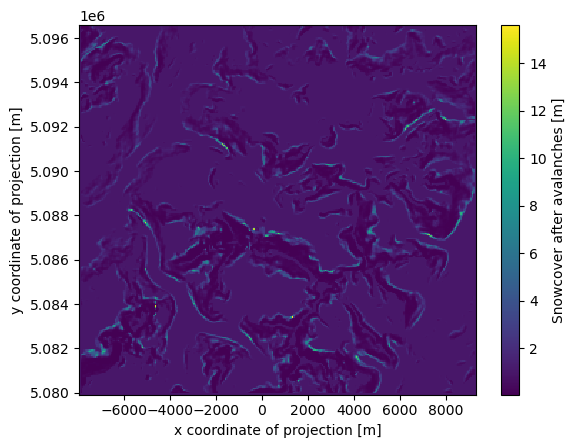

In [26]:
ds.snowslide_1m.plot();

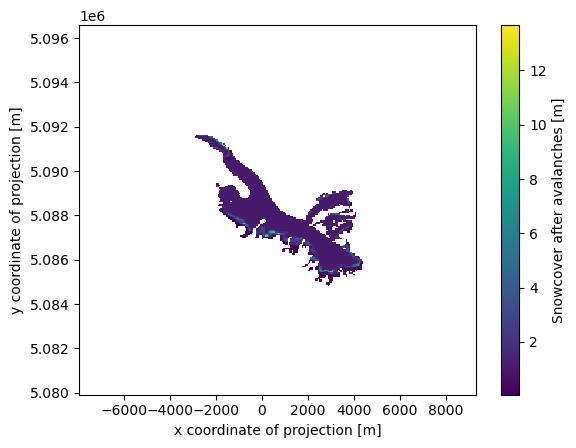

In [27]:
ds.snowslide_1m.where(ds.glacier_mask).plot();

In [28]:
add = ds.snowslide_1m.where(ds.glacier_mask, drop=True) - 1

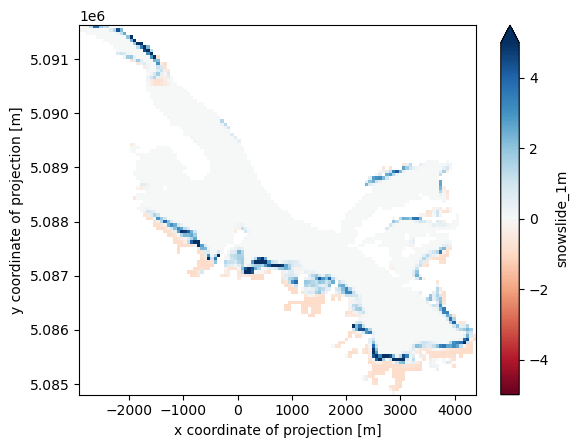

In [31]:
add.plot(cmap='RdBu', vmin=-5, vmax=5);

In [30]:
add.mean()

<xarray.DataArray 'snowslide_1m' ()>
array(0.21360919, dtype=float32)